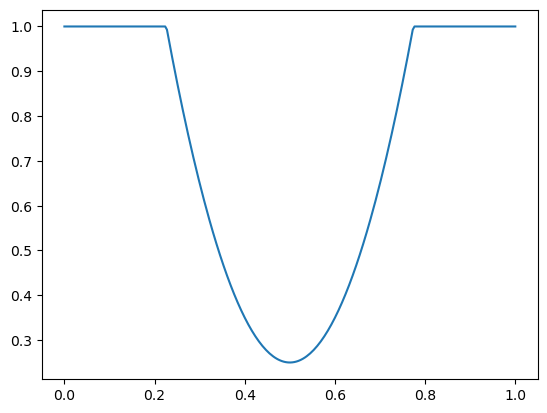

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Global parameters defined, as given in the question
x_tip, y_tip, R = 0.5, 0.25, 0.05


# fn to return the y-position of the tip, taking the values of x-position as the parameter
# simply a parabolic function, but bounded
def y(x):
    
    # calculate the true value of the parabolic function
    value = (x - x_tip)**2 / (2 * R) + y_tip
    
    # boundary considerations, as y = [0, 1]
    if value < 1: # within our bounds
        return value
    else:
        return 1
    
# x = np.linspace(0,1, 256)
# metal_tip = [y(x_el) for x_el in x]

# plt.plot(x, metal_tip)